# Assignment 4: Mid Point Review

Congratulations, you have reached the midpoint of the course! The rest of the course will be focused on more advanced state of the art machine learning techniques. However, before we dive into that, this assignment will be focused on ensuring you understand all the core concepts that have been covered so far. Keep in mind, these are questions that can be asked during machine learning internship interviews, so do make sure you understand them if you want to dive into this industry!

### 1) Linear vs Polynomial Regression
- Describe both Linear Regression and Polynomial Regression (3 lines or less each).

- Describe overfitting vs underfitting with respect to parameters.  


#### YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC
Linear regression: this simple "ML" technique is analagous to a line of best fit (emphasis on line!). Each feature is assigned a weight. This technique is essentially a system of linear equations, you have all your features multiplied by their wieghts, which gives you a predicted value for each sample. This is then compared to the expected label, and then optimized via gradient descent by minimizing error.

Polynomial regression: In a similar fashion to linear regression, polynomial regression sets up a system of equations for each of the samples. It also uses gradient descent to optimize the wieghts. However, this time, features are not necessarily of order 1 (ie. each linear equation representing a sample becomes a polynomial). The system is still linear with respect to the weights.

Over/underfitting: Overfitting can be thought of as "memorizing your training data". The parameters are so detailed that they begin to capture the random variance in your training data. Conversely, underfitting describes how models with less refined parameters are not able to capture the trends in your data.

### 2) Logistic Regression vs. Linear SVM
- Describe how logistic regression works (3 lines or less)
- Describe how linear SVM works. Mention the role(s) of:
    - support vectors
    - margin
    - slack variables
    - kernels
- Plot an example for SVM where the linear kernel is not enough to separate the data, but another kernel works

#### YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, 
Logistic regression better suited for binary classifications than linear regresison. The features are still considered through a system of linear equations, only this time the information is then passed to a sigmoid function that squishes all predictions between 0 and 1. Using bernouilli distribution, the output becomes either a 1 or a 0.

SVM: An svm tries to separate all the data into classes in a hyperplane in a way that retains the most variance between the data possible. The distance, or variance, between the point closest to the boundary line in called the support vector (there is one on either side of the boundary. So, the svm tries to maximize the magnitude of these two vectors. The combined magnitude is called the margin.
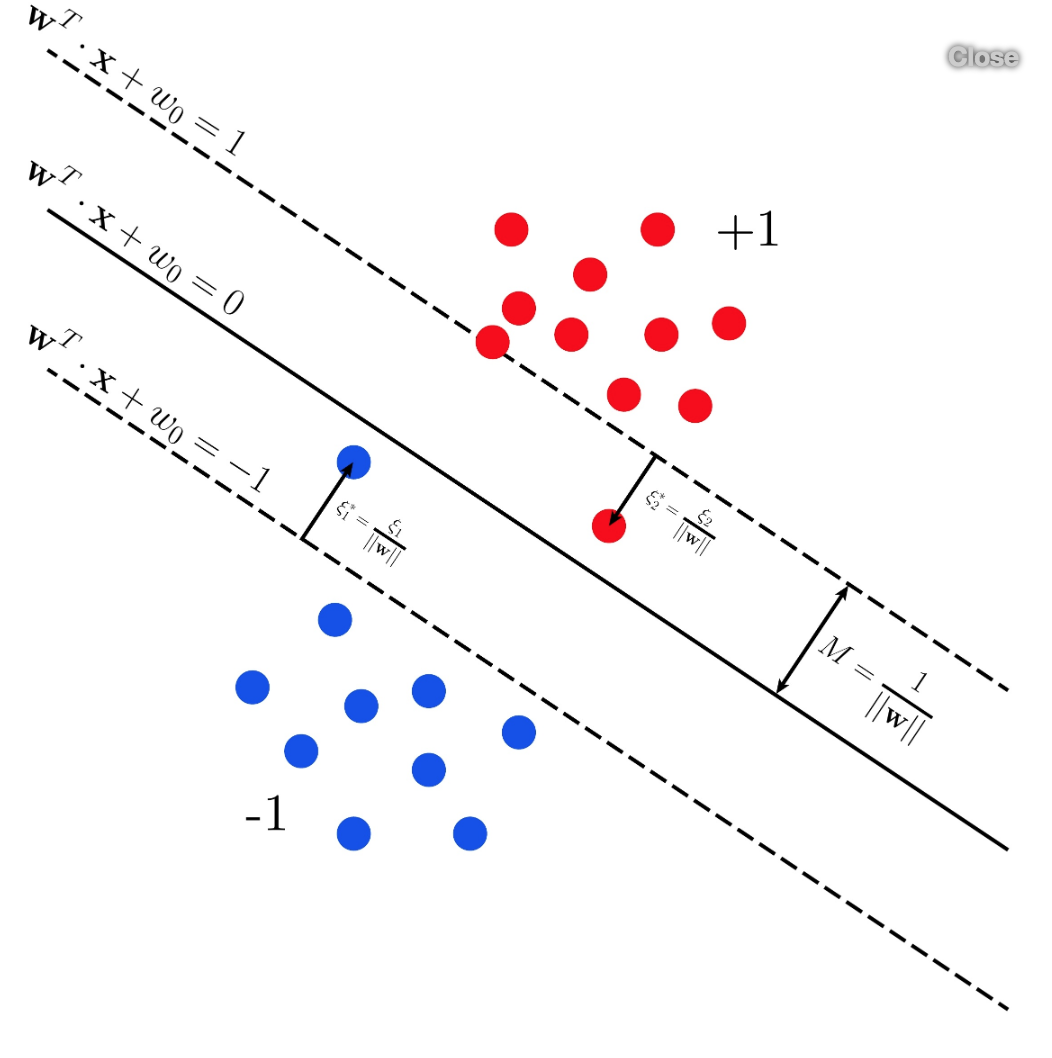

In the diagram above, the slack variable is given by the arrow pointing from the margin/dashed line and the blue dot.
    If data is not perfectly separable by an svm, slack variables can be used to guage the error of the points that are assigned to on the wrong side of the margins. Slack variables account for the ratio of the distance between error point and a hyper plane with the error point and its margin (or marginal hyperplane). The more "slack" that you allow in your svm, the higher amount of error you account for, the sloppier your margins will be. SVMs belong to a larger bag of tricks called kernels. All kernels essentially try to separate data with lines or hyperplanes.
    
In the example below, a linear kernel is not enough to separate the data. However, if mapped to a higher dimension, we can separate the data.

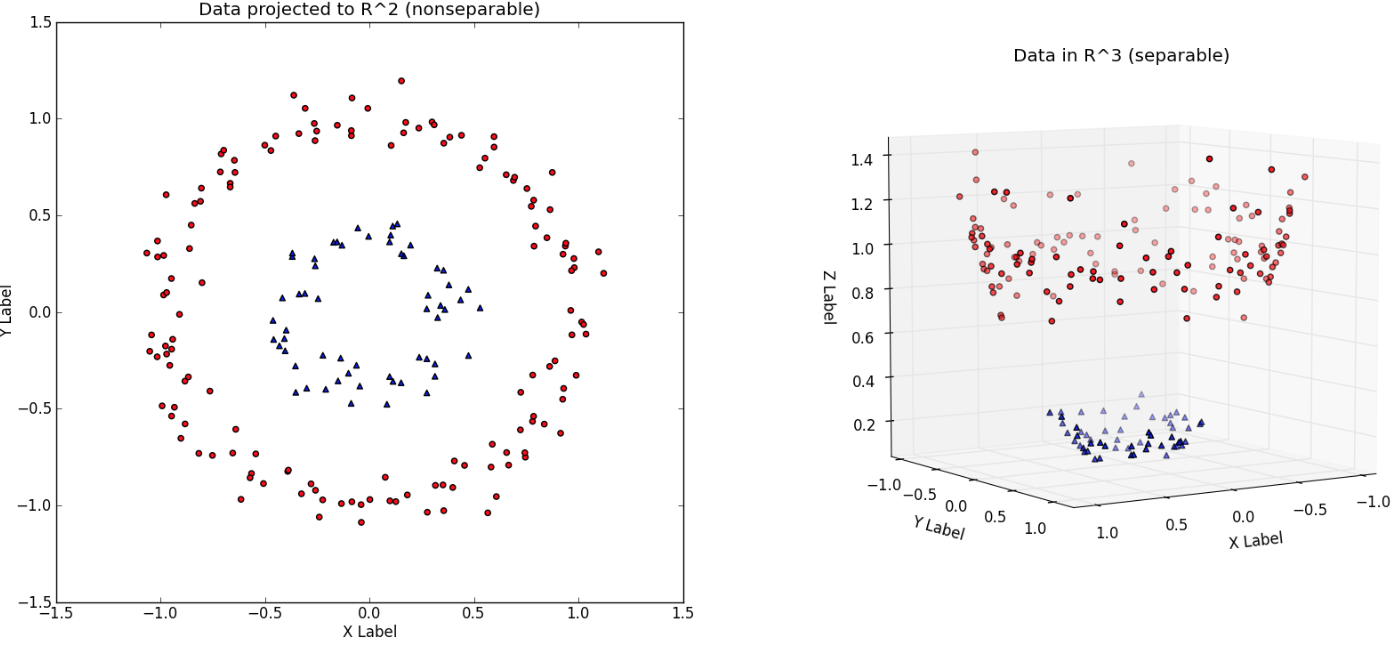

### 3) Linear SVM vs k-NN
- K-Nearest Neighbours is a popular unsupervised learning algorithm. Explain the difference between supervised and unsupervised learning.
- K-NN is an example of a lazy learning algorithm. Why is it called so? What could be a use case? Justify using a lazy learning algorithm in that case.
- Outline the main steps for the KNN algorithm. Use text, code, plots, diagrams, etc as necessary.  
- Plot a example dataset which works in an SVM classification and not k-NN classification. Repeat for the reverse scenario.

##### YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC

Supervised learning used features and labels in order to split data. Importantly, each sample has an expected/predicted output. This differs from unspervised learning, where an algorithm is given unlabeled data, and clusters it in order to search for intrinsic patterns

k-NN is called a lazy algorithm because of instead of trying to find patterns/functions that separate data, it memorizes the trainset. So, given a test point, the k-nn will search for the 'nearest neighbors' in the trainset instead of computing a function.

the following pictures/graphs were taken from www.analyticsvidhya.com
Some of the main steps for the implemnetation of a k-NN algortithm are: 
1. define what the distance means in your dataset.
    because you want to look at train points that are close to your test point, you have to give some tangible means of telling the computer what "closeness" means. For example, a simple case would be to use the Euclidean distance between points.
    
2. Iterate through your training data set and compute the distance (as defined above) from each point to the test point. 
    
4. choosing k ie. choosing the amoount of neighbors to poll from. So if k=5 then the algorithm look at the five closest data points in your set.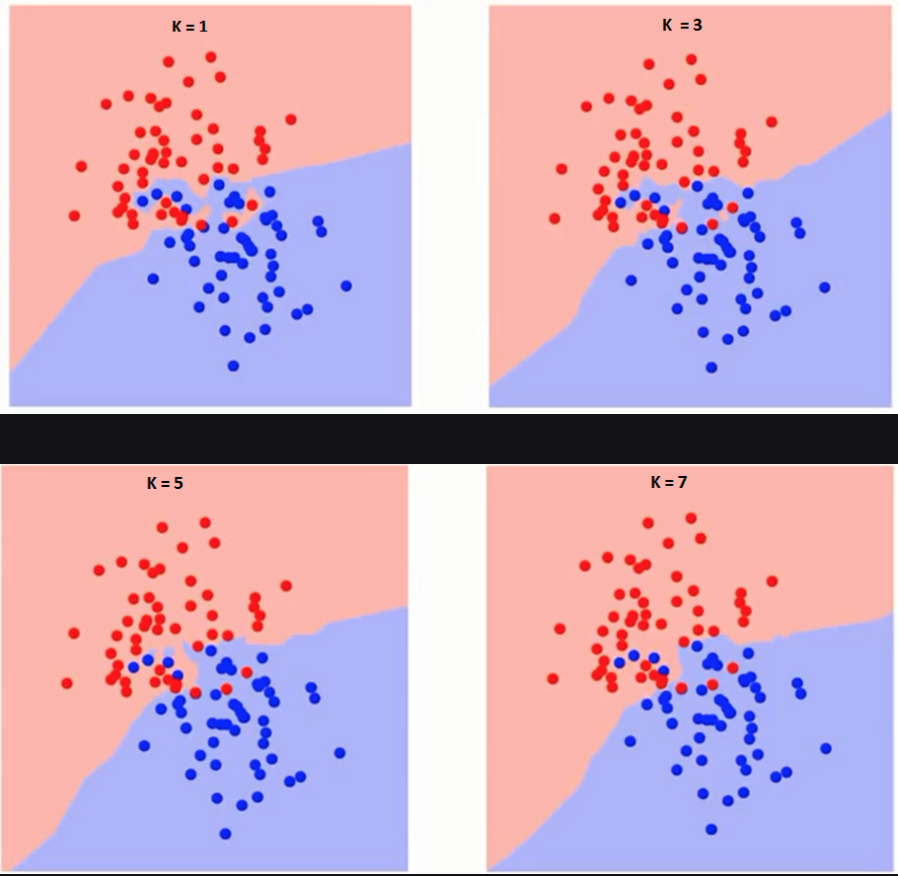

As shown, the lines between classes smoothes out as K increases.

5. Look at the classes of the k-nearest neighbors, and from that predict the class of the test point.


### 4) K-NN Implementation
- Implement the K-NN algorithm by hand (ie. Don't use the sklearn implementation).

In [74]:
# Implement kNN by hand. It might be useful to store all distances in one array/list

import pandas as pd
import numpy as np
import operator
from sklearn.datasets import load_iris


# loading dataset
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])



## YOUR CODE HERE

# step 1: Define distance
def eucDistance(x1, x2):
    '''This function computes the euclidean distance
    from x1 to x2
    Input: list of features (pedal length, width, etc), test data
    Output: eucDistance'''
    sum = 0
    for i in range(len(x2)):
        sum += np.square(x1[i] - x2[i])
    
    return np.sqrt(sum)

# step 2: Define the k-nn algorithm
def knn(trainset, test, k):
    '''Input: trainset, a test point, and k
    Outputs: nearest neihbours + a classification
    '''
    #list of (target_label, distance)
    distances = []
    
    #find distance to each point
    for x in range(trainset.shape[0]):
        
        train_point = iris_df.iloc[x].to_dict()
        d = eucDistance(list(train_point.values()),test)
        
        distances.append((trainset.iloc[x]['target'],d))
        
    #step 3: sort the values according in ascending eucDistance order
    nearest = sorted(distances, key=lambda x: x[1])

    #step 4: Get the k-nearest neighbors
    knns = []
    for i in range(k):
        knns.append(nearest[i][0])
    
    #step 5: get most common target in the list
    clf = np.bincount(knns).argmax()
    
    return(clf,nearest[:k])

#test the alogrithm
test = [2.0,1.5,3.4,0.8]
clf, neigbours = knn(iris_df,test,17)

print(clf)

1


In [2]:
# Preview dataset
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

### 5) Ensemble Methods
- Explain bagging and boosting. Clearly illustrate the difference between these methods. When would you use either one?
- What is a decision tree? What is a random forest? Compare them and list 3 pros and cons of each?

#### YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC
Bagging and boosting are two algorithms that combine several ML algorithms in order to increas their performance. Bagging tries to decrease variance while boosting tries to decrease bias. Bagging stands for bootstrap aggregation and treis to decrease the variance in your model by creating additional training data from your trainset.

Boosting is an algorithm that splits the training data and creates sub-ML models on those subsets. Each preceding model puts emphasis on the training points that were mis-classified by the previous algorithm. By doing so, boosting aims to decrease the bias in the final, compiled model.

Bagging would be useful when dealing with high variance models (with low bias for argument's sake) while boosting can be used for models with a high bias and low variance.

A decision tree is a simple algorithm to classify data. It works kind of like a flow chart, and splits the data at each node into subgroups. A random forest is a collection of decision trees that averages the result of the trees in the forest.

Tree pros: 1.Easy interpretability/simplicity, 2.you are easily able to see the inner workings of the tree, 3.Very fast.
Tree cons: 1.Prone to overfitting especially as number of nodes increases, 2.Only chooses the best result at each node (not necessarily good for the global optimum), 3.Optimized for decision boundaries parallel to the axes, so might have issues with diagnonal decision boundaries

Forest pros: 1.Decreases variance due to averaging of results from decision trees, 2.Less risk of overfitting, 3.Limit bias of each individual tree.
Forest cons: 1. Does not perform very well on unbalanced dataset with rare cases, 2.Is less interpretable/hyperparameters are less clear, 3.As a bunch of decision trees, forests are still bound to data that is easily separable by decision boundaries parallel to its axes

### 6) PCA vs Autoencoders
- Describe how PCA achieves dimensionality reduction. Outline the main steps of the algorithm
- What is the importance of eigenvectors and eigenvalues in the PCA algorithm above.
- When we compute the covariance matrix in PCA, we have to subtract the mean. Why do we do this?
- What is Autoencoder (compare it to PCA)? Why are autoencoders better in general.
- When is the reduced dimension of an encoder equivalent to that of a PCA

###### YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC
PCA uses linear transformations to project the feature space to a subspace of lower dimensionality. The question then becomes, how do you retain the integrity of your features? PCA tries to sovle this in a few steps.
1. "whiten" your data by subtracitng the mean. You do this because you want to center your data at the origin. 2. calculate the covariance matrix. 3. find the eigenvectors of the covariance matrix 4.(optional :)) Compare the projected data to the original by cross validation

Eigenvectors are important because they remain on their span during such a transformation. So, you want to find eigenvectors whose span is in the direction of largest variance (given by the covariance matrix). This way, during the transformation, the integrity of the variance holds. The corresponding eigenvalues represent the magnitude of the eigenvector which will equals the magnitude fo variance.

We subtract the mean in order to generate a covariance matrix, centering our data at the origin.

An autoencoder is a neural network where instead of having m' eigenvectors, you have m' nodes. They try to learn some identity function through which to reduce feature spcace while keeping the integrity. Autoencoders are better in general because they are able to learn non-linear relationships unlike PCA, which relies on linear transformations.

The reduced dimension of an encoder is the same as the PCA when the number of eigenvectors in the W matrix is the same as the number of nodes in your neural net.

### 7) Implementation

In the 1980's', Alex 'Sandy' Pentland came up with 'EigenFaces'. A novel way for facial classification using dimensionality reduction. We are going to try replicate the experiment in this question. We have loaded the face dataset for you below. Here's some steps for you: 

- Use PCA to reduce its dimensionality.
- Use any algorithm to train a classifier for the dataset. You may use sklearn or pytorch. (Refer to PCA demo notebook for hints)
- (Optional) Use autoencoders for the dimensionality reduction, compare results to PCA. Any comments/conculsions?


In [15]:
# loading the faces dataset
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from skimage.transform import resize
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people

import warnings
for warning in (FutureWarning, np.ComplexWarning):
    warnings.simplefilter(action='ignore', category=warning)
    
    
# uncomment below to load dataset(takes ~5 mins to load data)
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# assigning features vectors
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


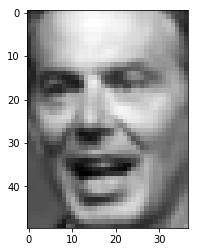

[[   92.42229      93.404816    225.70357   ...   -64.509186
    -38.35134     -34.681866 ]
 [  646.10297    -496.72827     290.8095    ...   -29.08619
    161.02608     -73.10511  ]
 [ -488.29547    -194.56091    -374.94708   ...    22.779469
   -132.82558     152.44014  ]
 ...
 [ 1221.9841      244.1111     -111.04763   ...    11.260883
     10.6924305    -5.7019978]
 [-1234.8031     -407.62787     330.6359    ...   -61.787964
     -8.620484     21.364166 ]
 [  382.34515     -98.2372      290.00732   ...    14.888678
    -59.4018        5.1533394]]


In [84]:
# plot an example image
plt.imshow(X[1].reshape(h,w), cmap = 'gray')
plt.show()

### insert your code here ###
#step 1 whiten data by subtracting the mean
mean_by_row = np.average(X, axis=0)
X_bar = X - mean_by_row

#step 2 compute the covariance matrix
sigma = X_bar.T.dot(X_bar)

#step 3 find the eigenvalues for covariance matrix
eigenvalues, unit_vects = np.linalg.eig(sigma)

#visualizing eigenvalues
#plt.plot(np.arange(len(eigenvalues)), eigenvalues)
#plt.show()

#step 4 now instead of 1850 features we have 150
pca = PCA(n_components=50)
pca.fit(X)

X_pca = pca.transform(X)
print(X_pca)

bagged decision tree
                   precision    recall  f1-score   support

     Ariel Sharon       0.50      0.25      0.33        16
     Colin Powell       0.66      0.67      0.67        61
  Donald Rumsfeld       0.37      0.28      0.32        25
    George W Bush       0.70      0.88      0.78       147
Gerhard Schroeder       0.76      0.50      0.60        26
      Hugo Chavez       0.57      0.27      0.36        15
       Tony Blair       0.65      0.53      0.59        32

      avg / total       0.65      0.67      0.65       322



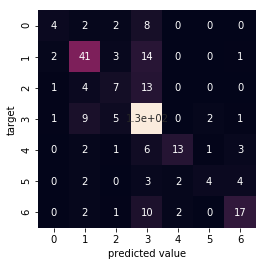

random forest
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.12      0.22        16
     Colin Powell       0.84      0.69      0.76        61
  Donald Rumsfeld       0.62      0.20      0.30        25
    George W Bush       0.62      0.98      0.76       147
Gerhard Schroeder       1.00      0.19      0.32        26
      Hugo Chavez       0.67      0.13      0.22        15
       Tony Blair       0.78      0.56      0.65        32

      avg / total       0.73      0.68      0.63       322



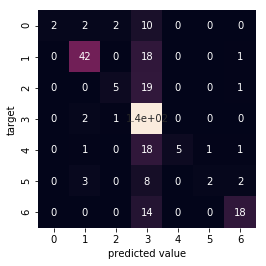

In [83]:
# Classification using X_pca
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

#split data for pca
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, shuffle = True)

def forest(x_train, y_train, x_test):
    clf = RandomForestClassifier(n_estimators=100, min_samples_split=5, bootstrap=True)
    model = clf.fit(x_train, y_train)
    return model.predict(x_test)

#use bagging to increase variance
def bag(base, x_train, y_train, x_test):
    clf = BaggingClassifier(base_estimator=base,n_estimators=20,random_state=42)
    model = clf.fit(x_train, y_train)
    return model.predict(x_test)

bag_preds_pca = bag(DecisionTreeClassifier(), X_train, y_train, X_test)
forest_preds_pca = forest(X_train, y_train, X_test)

model_preds_pca = {'bagged decision tree':bag_preds_pca,'random forest':forest_preds_pca}

for name,preds in list(model_preds_pca.items()):
    print(name)
    print(classification_report(y_test, preds, target_names=target_names))
    mat = confusion_matrix(y_test, preds, labels=range(n_classes))
    sns.heatmap(mat, square=True, annot=True, cbar=False)
    plt.xlabel('predicted value')
    plt.ylabel('target')
    plt.show()

## Bonus Challenge! (Optional)

This will take some time. However, trust that it is a rewarding experience. There will be a prize for whoever implements it correctly!

- Implement a feed forward neural network with back proprogation using stochastic gradient descent by hand. 
- Use any dataset you want and test the accuracy

I will not be attempting the bonus challenge. Instead here are some of my favourite wave check memes.
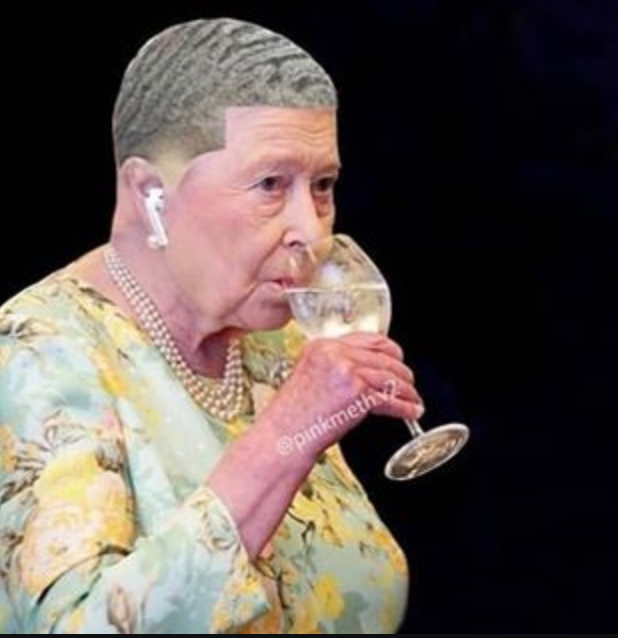

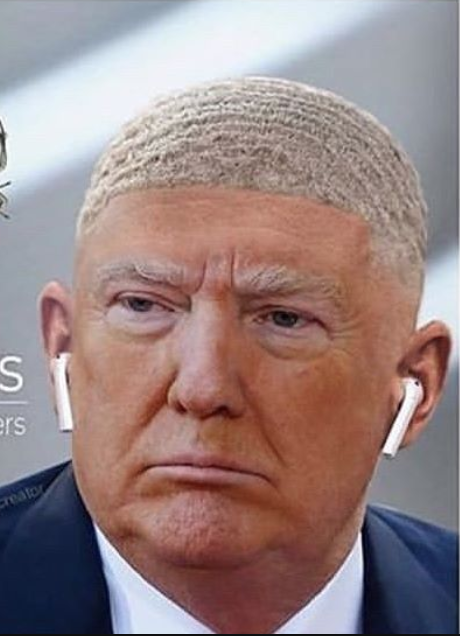

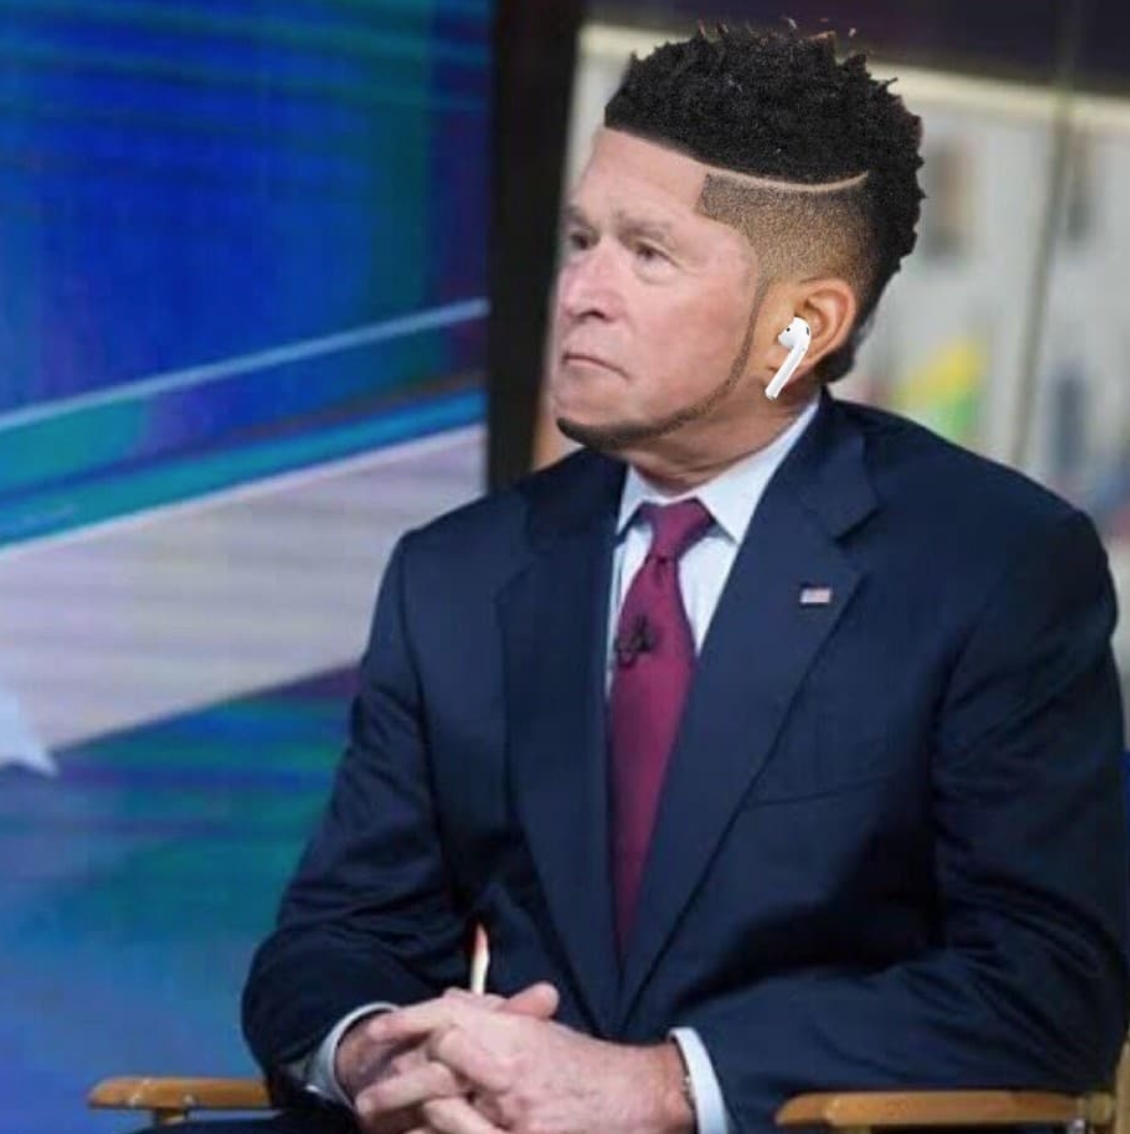